In [1]:
#using Pkg;Pkg.instantiate()
using EVQueues, Plots, ProgressMeter

In [2]:
lambda=120.0;
mu=1.0;
gamma=0.5;
C=80.0;

Tfinal=100.0;
snaps = collect(0.1:.5:100.0);

In [3]:
sim = ev_edf(lambda,mu,gamma,Tfinal,C,snapshots=snaps);

Simulando... 100%|██████████████████████████████████████| Time: 0:00:01


Creando animacion... 100%|██████████████████████████████| Time: 0:00:13
┌ Info: Saved animation to 
│   fn = /tmp/anim.gif
└ @ Plots /home/andres/.julia/packages/Plots/6RLiv/src/animation.jl:104


Plots.AnimatedGif("/tmp/anim.gif")
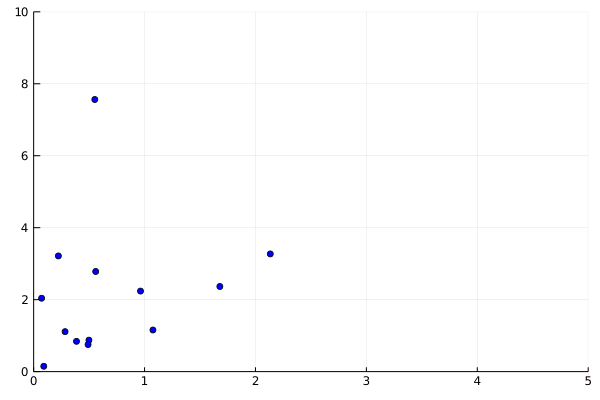

In [4]:
prog=Progress(length(snaps), dt=1, desc="Creando animacion... ");

anim = @animate for snapshot in sim.snapshots

    charging = [ev for ev in snapshot.charging]
    w = [ev.currentWorkload for ev in charging]
    d = [ev.currentDeadline for ev in charging]
    u = [ev.currentPower for ev in charging]

    p=scatter(w[u.>0],d[u.>0],markershape=:circle,color=:blue,legend=:none,xlims = (0,5/mu), ylims = (0,5/gamma));
    scatter!(p,w[u.==0],d[u.==0],markershape=:circle,color=:red,legend=:none);

    next!(prog);
end

gif(anim, "/tmp/anim.gif", fps = 10)